In [1]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

-rw-r--r-- 1 root root 63 Sep 13 06:22 kaggle.json
 98% 329M/337M [00:07<00:00, 55.9MB/s]
100% 337M/337M [00:07<00:00, 48.2MB/s]


In [2]:
from zipfile import ZipFile
filepath = "/content/cell-images-for-detecting-malaria.zip"
with ZipFile(filepath,"r") as zip:
    zip.extractall()
    print("Done")

Done


In [0]:
import os

In [0]:
list1 = os.listdir("/content/cell_images/Parasitized")
list2 = os.listdir("/content/cell_images/Uninfected")

In [142]:
list1.pop(11668)
list2.pop(11766)

'Thumbs.db'

In [0]:
list_uninfec = []
for i in range(len(list2)):
    list_uninfec.append(os.path.join("/content/cell_images/Uninfected",list2[i]))

In [0]:
list_infected = []
for i in range(len(list1)):
    list_infected.append(os.path.join("/content/cell_images/Parasitized",list1[i]))


In [10]:
list_infected[:5]

['/content/cell_images/Parasitized/C84P45ThinF_IMG_20150818_101056_cell_98.png',
 '/content/cell_images/Parasitized/C118P79ThinF_IMG_20151002_104831_cell_168.png',
 '/content/cell_images/Parasitized/C179P140ThinF_IMG_20151127_153521_cell_165.png',
 '/content/cell_images/Parasitized/C80P41ThinF_IMG_20150817_111943_cell_15.png',
 '/content/cell_images/Parasitized/C184P145ThinF_IMG_20151203_102543_cell_174.png']

In [11]:
list_uninfec[:5]

['/content/cell_images/Uninfected/C4thin_original_IMG_20150608_170016_cell_218.png',
 '/content/cell_images/Uninfected/C80P41ThinF_IMG_20150817_110957_cell_34.png',
 '/content/cell_images/Uninfected/C138P99ThinF_IMG_20151005_173241_cell_21.png',
 '/content/cell_images/Uninfected/C75P36_ThinF_IMG_20150815_163225_cell_1.png',
 '/content/cell_images/Uninfected/C154P115ThinF_IMG_20151115_141507_cell_110.png']

In [0]:
import matplotlib.pyplot as plt


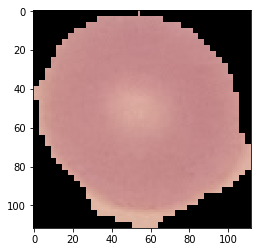

In [147]:
img = plt.imread(list_uninfec[11766])
plt.imshow(img)

In [0]:
import cv2

In [0]:
import numpy as np

# CHECKING HOW MANY UNINFECTED CELL IS DETECTED

In [0]:
list3 = []
list4 = []
for i in range(len(list_uninfec)):
    img = cv2.imread(list_uninfec[i],1)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray[gray<1]=255
    ret,mask = cv2.threshold(gray,110,255,cv2.THRESH_BINARY)
    if np.unique(mask).shape[0] == 1:
        list3.append(i)
    else:
        continue

In [236]:
print("The percentage of predicting uninfected cell: ",(len(list3)/len(list2))*100)

The percentage of predicting uninfected cell:  94.2013208505697


# CHECKING HOW MANY INFECTED CELL IS DETECTED

In [0]:
list5 = []
list6 = []
for i in range(len(list_infected)):
    img = cv2.imread(list_infected[i],1)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray[gray<1]=255
    ret,mask = cv2.threshold(gray,110,255,cv2.THRESH_BINARY)
    if np.unique(mask).shape[0] == 2:
        list5.append(i)
    else:
        continue

In [237]:
print("The percentage of predicting uninfected cell: ",(len(list5)/len(list1))*100)

The percentage of predicting uninfected cell:  94.06342985702881
